# Assignment 5
## Parth Kothari
## 2303121012

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
Stat_chek = np.genfromtxt('Stationarity_check.txt',comments = '!')
Stat_chek_2 = np.genfromtxt('Stationarity_check2.txt',comments = '!')

# STat check 1

[0.04771938 0.99960359]


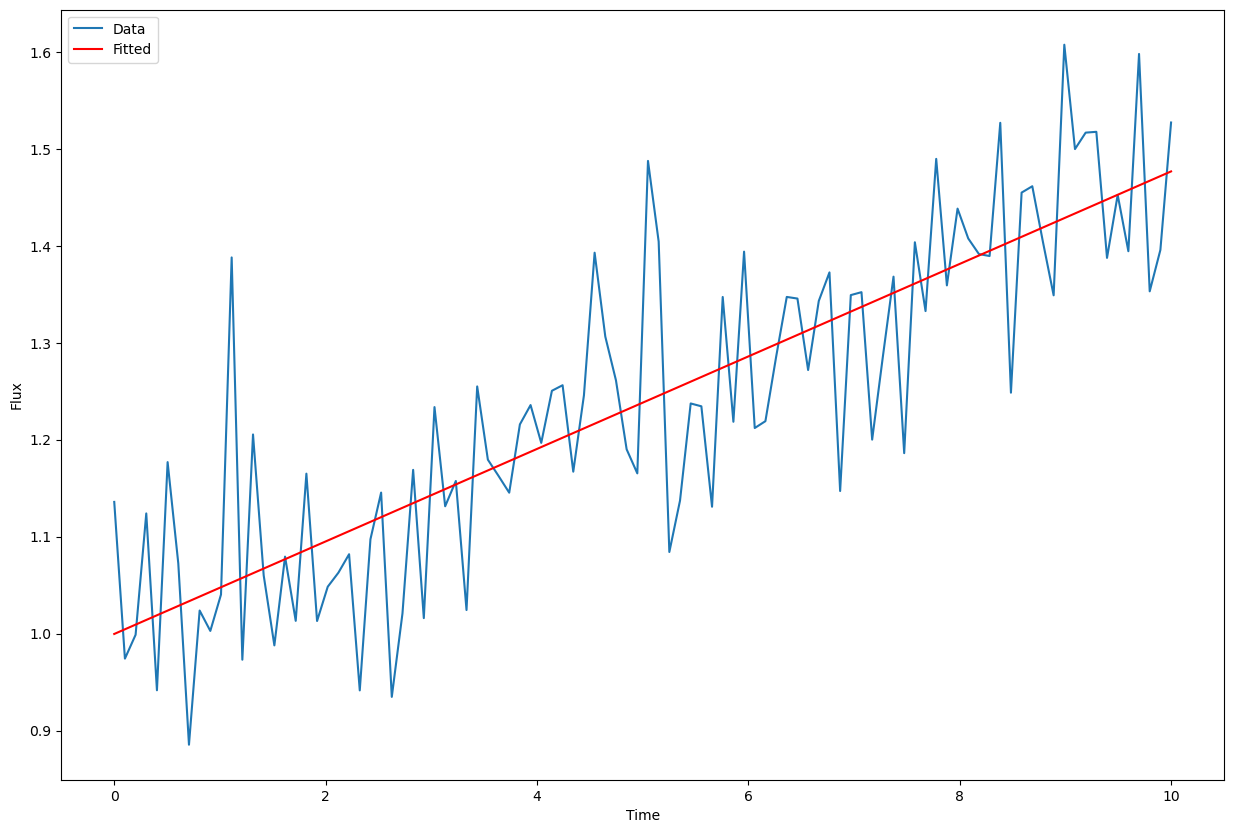

In [3]:
# STAT CHECK 1
Time = Stat_chek[:,0]
Flux = Stat_chek[:,1]
Error = Stat_chek[:,2]
plt.rcParams['figure.figsize']=(15,10)
plt.plot(Time,Flux,label='Data')
plt.xlabel('Time') 
plt.ylabel('Flux')

def straightline_model(x,m,c):
    return m*x + c
params,cov = curve_fit(straightline_model,Time,Flux) #directly using the curve fit
print(params)
best_fit = straightline_model(Time,params[0],params[1])
plt.plot(Time,best_fit,'r',label='Fitted')
plt.legend()

The mean is:1.0629024585122275 and variance is: 0.11531767277962449
The mean is:1.0738424880496733 and variance is: 0.081392109184405
The mean is:1.2419918920210753 and variance is: 0.08561892048383858
The mean is:1.2697276408979383 and variance is: 0.09383194525289992
The mean is:1.3517387217406216 and variance is: 0.10107876155306188
The mean is:1.4480208635364336 and variance is: 0.0923747991375325


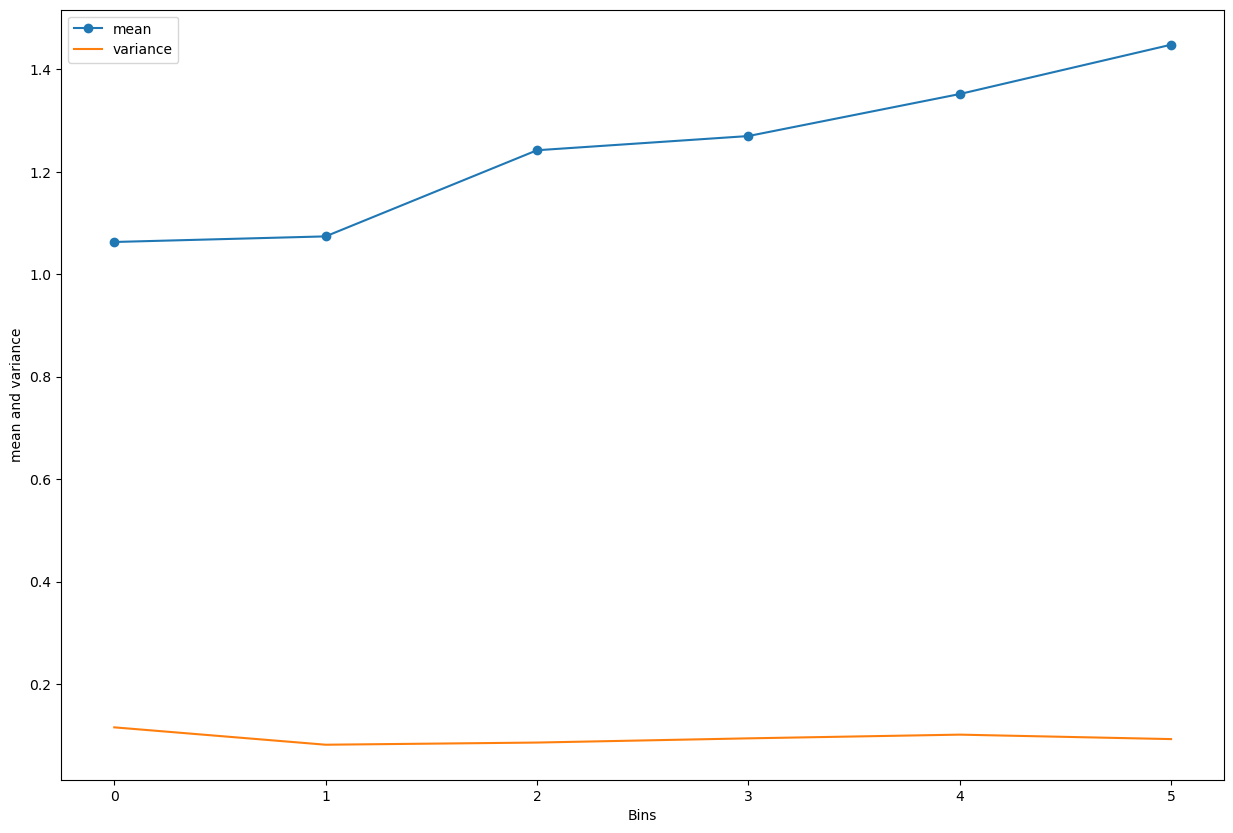

In [4]:
# Mean and STD before fit
bins = np.array_split(Flux,6)
x = np.arange(0,6)
mean_1 = []
std_1 = []
for i in bins:
    mean = np.mean(i)
    std = np.std(i)
    mean_1.append(mean)
    std_1.append(std)
    print(f'The mean is:{mean} and variance is: {std}')
plt.plot(x,mean_1,'o-',label='mean')    
plt.plot(x,std_1,label="variance")
plt.xlabel('Bins') 
plt.ylabel('mean and variance')
plt.legend()

The mean is:0.024737749851955676 and variance is: 0.11470543129190956
The mean is:-0.04626459098237707 and variance is: 0.07870105017194219
The mean is:0.03994244261724614 and variance is: 0.07736630818323194
The mean is:-0.014264178877669216 and variance is: 0.08569234120264954
The mean is:-0.011785398689947338 and variance is: 0.08707092278179229
The mean is:0.007374512167719963 and variance is: 0.08983636126252172


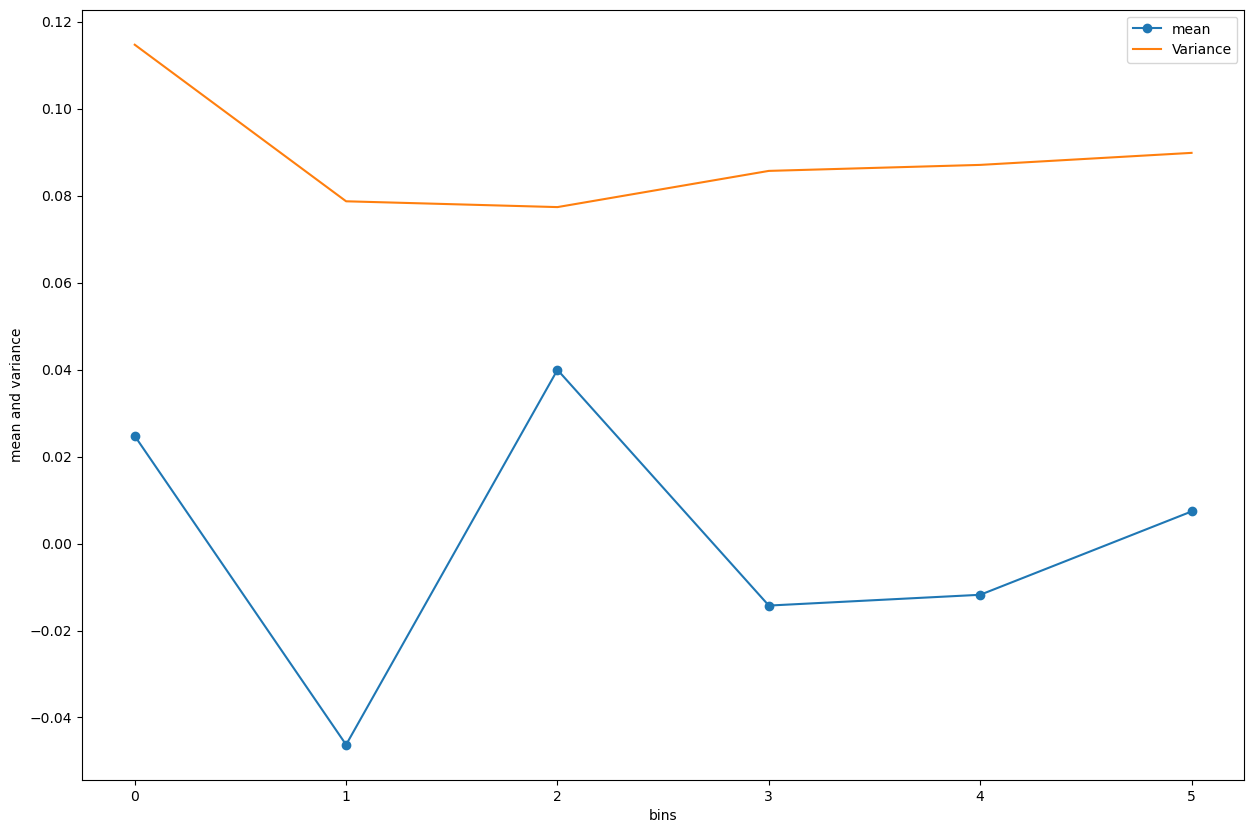

In [5]:
# residue calculation from best fit And then plotting
residue  = Flux - best_fit 
bins = np.array_split(residue,6)
x = np.arange(0,6)
mean_1 = []
std_1 = []
for i in bins:
    mean = np.mean(i)
    std = np.std(i)
    mean_1.append(mean)
    std_1.append(std)
    print(f'The mean is:{mean} and variance is: {std}')
plt.plot(x,mean_1,'o-',label = 'mean')    
plt.plot(x,std_1,label='Variance')
plt.xlabel('bins')
plt.ylabel('mean and variance')
plt.legend()

Text(0, 0.5, 'Flux')

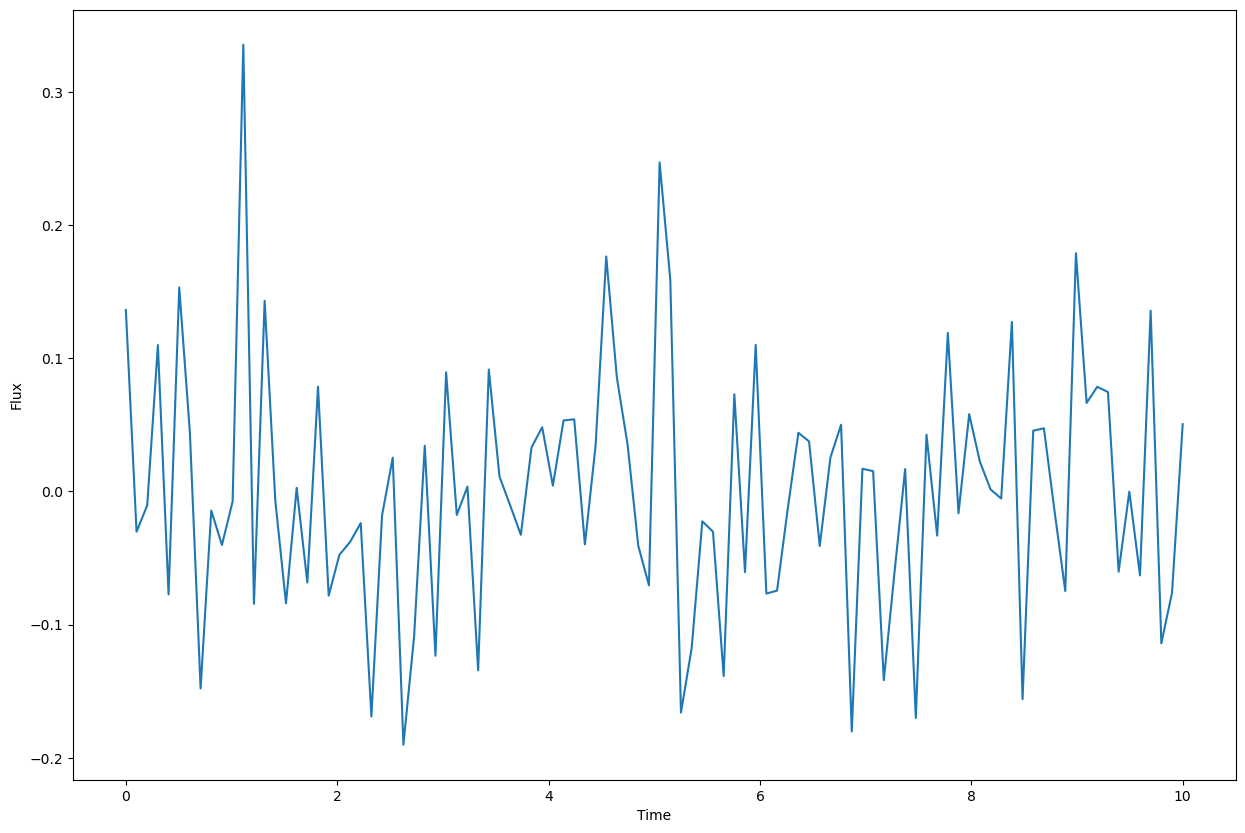

In [6]:
# First Order differencing
plt.plot(Time,residue)
plt.xlabel('Time')
plt.ylabel('Flux')

bins = np.array_split(Flux,6)
binn = [0]*6
avg = [0]*6
stdv = [0]*6
for i in range(6):
    binn[i] = i
    avg[i] = np.mean(bins[i])
    stdv[i] = np.std(bins[i])
    print(f'Mean of bin {i} = {np.mean(bins[i])},-- std var of bin{i} = {np.std(bins[i])}')

# NGC

In [ ]:
data_csv = pd.read_csv('NGC_1275_MJD_57000_59823.csv')
data_csv.head()

x = (data_csv['MJD'])
y = (data_csv['FLUX'])
plt.xlabel('Time')
plt.ylabel('Flux')
plt.rcParams['figure.figsize']=(15,10)
plt.plot(x,y)
# PANDA use
flux_diff1 = data_csv.diff(
        periods=1,
        axis=0
)
data_csv['FluxDiff'] = flux_diff1['FLUX'].fillna(0)
# YOu can use np.diff instead of panda library here
# For difference ALso see vijay's code.

plt.plot(x,data_csv['FluxDiff'])
    

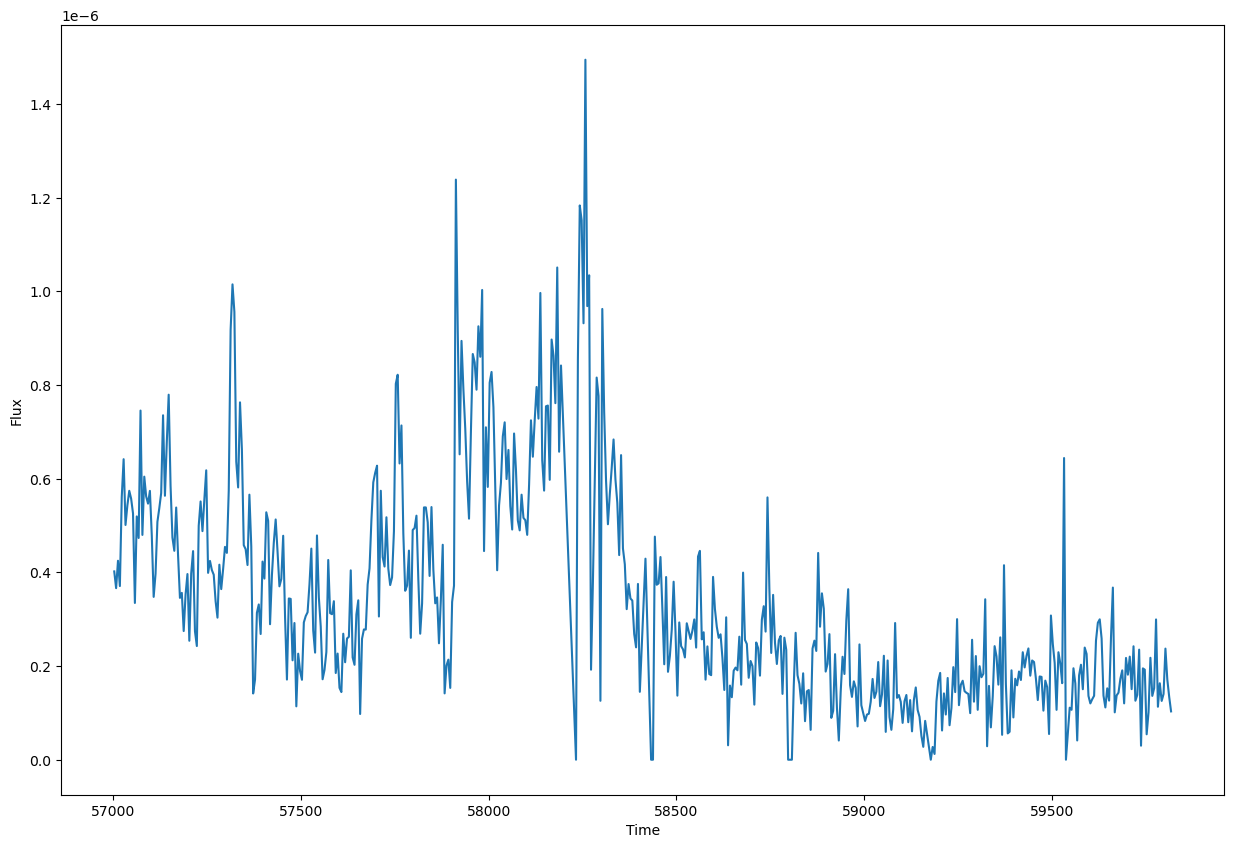

In [7]:
data_csv = pd.read_csv('NGC_1275_MJD_57000_59823.csv')
data_csv.head()

x = (data_csv['MJD'])
y = (data_csv['FLUX'])
plt.xlabel('Time')
plt.ylabel('Flux')
plt.rcParams['figure.figsize']=(15,10)
plt.plot(x,y)

flux_new = []
time_new = []
for i in range(len(y)-1):
    c = y[i+1]-y[i]
    v = (x[i+1]+x[i])/2
    flux_new.append(c)
    time_new.append(v)


The mean is:4.777304282104848e-07 and variance is: 1.5286144768053432e-07
The mean is:3.709977247342235e-07 and variance is: 1.8262437783470038e-07
The mean is:6.439991244402548e-07 and variance is: 2.5138692004299065e-07
The mean is:2.4168571698790015e-07 and variance is: 1.060230372682658e-07
The mean is:1.4543477303950313e-07 and variance is: 7.306284417995186e-08
The mean is:1.7644761498211053e-07 and variance is: 8.634590380318057e-08


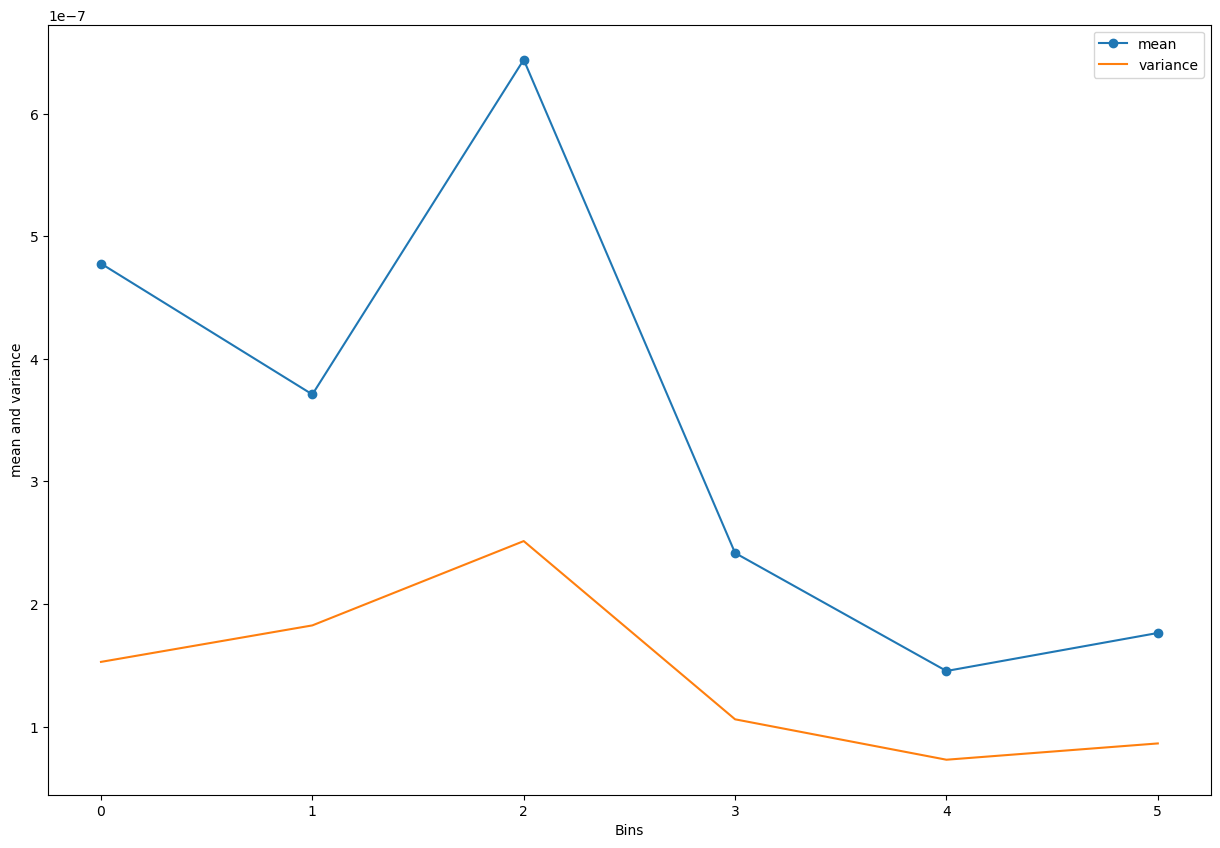

In [8]:
bins = np.array_split(y,6)
a = np.arange(0,6)
mean_1 = []
std_1 = []
for i in bins:
    mean = np.mean(i)
    std = np.std(i)
    mean_1.append(mean)
    std_1.append(std)
    print(f'The mean is:{mean} and variance is: {std}')
plt.plot(a,mean_1,'o-',label='mean')    
plt.plot(a,std_1,label="variance")
plt.xlabel('Bins') 
plt.ylabel('mean and variance')
plt.legend()

Text(0, 0.5, 'Flux')

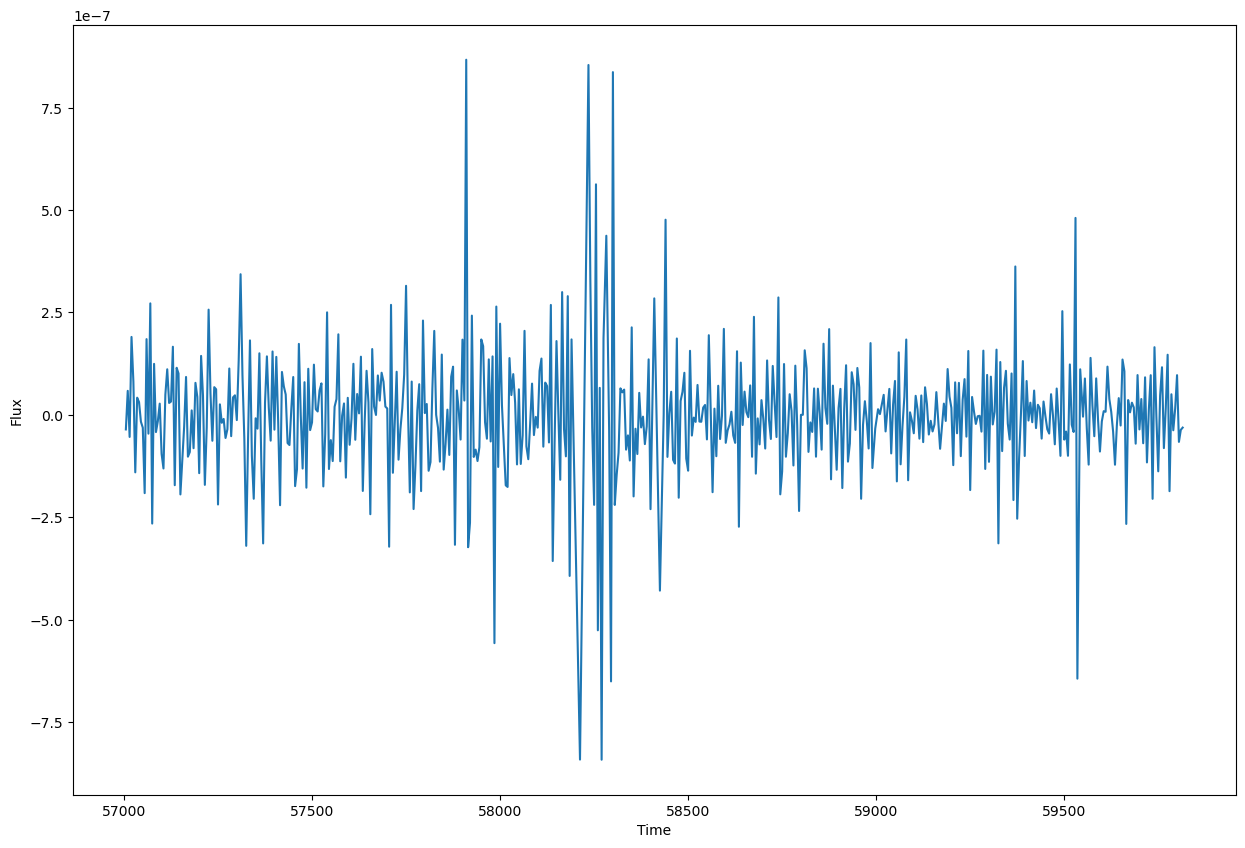

In [9]:
plt.plot(time_new,flux_new)
plt.xlabel('Time')
plt.ylabel('Flux')


The mean is:-1.7944826619097653e-09 and variance is: 1.1549105239218856e-07
The mean is:-3.3911825775391044e-10 and variance is: 1.3064802542971454e-07
The mean is:4.6178869448594934e-09 and variance is: 1.2873103984552597e-07
The mean is:-1.0653036710253262e-09 and variance is: 1.9131671190803663e-07
The mean is:-8.728589732173057e-09 and variance is: 3.159142372533554e-07
The mean is:4.551748351601559e-09 and variance is: 1.2194366778859726e-07
The mean is:-7.594625643327199e-11 and variance is: 1.0950840000352572e-07
The mean is:-1.9144050347446854e-09 and variance is: 7.837075496572363e-08
The mean is:-5.870613212484997e-10 and variance is: 1.5692686002148074e-07
The mean is:-1.467589575342233e-10 and variance is: 9.041278909706318e-08


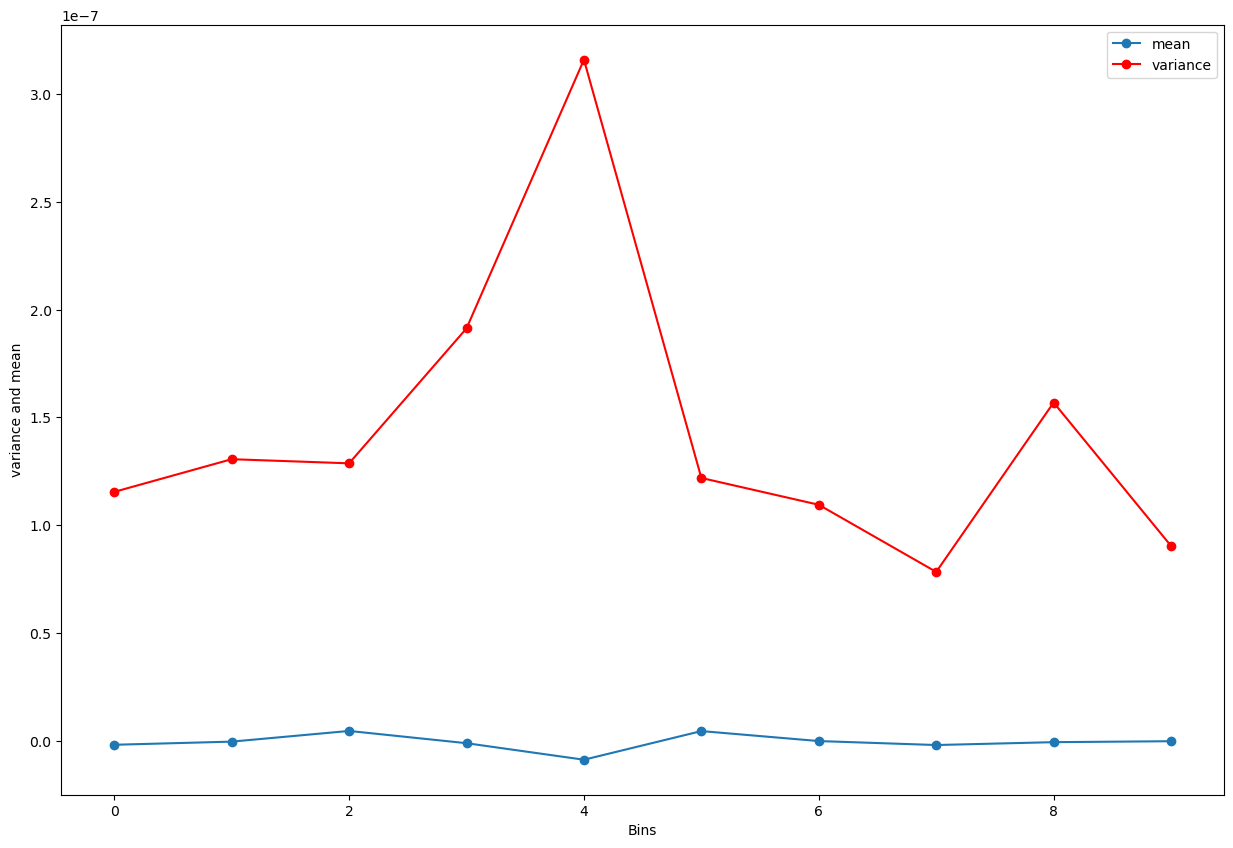

In [10]:
bins = np.array_split(flux_new,10)
x = np.arange(0,10)
mean_1 = []
std_1 = []
for i in bins:
    mean = np.mean(i)
    std = np.std(i)
    mean_1.append(mean)
    std_1.append(std)
    print(f'The mean is:{mean} and variance is: {std}')
plt.plot(x,mean_1,'o-',label='mean')
plt.plot(x,std_1,'o-',color = 'red',label="variance")
plt.xlabel('Bins') 
plt.ylabel('variance and mean')
plt.legend()

plt.plot(x,std_1,'o-',color = 'red',label="variance")
plt.xlabel('Bins') 
plt.ylabel('variance')
plt.legend()

data_csv = pd.read_csv('NGC_1275_MJD_57000_59823.csv')
data_csv.head()

x = (data_csv['MJD'])
y = (data_csv['FLUX'])
plt.xlabel('Time')
plt.ylabel('Flux')
plt.rcParams['figure.figsize']=(15,10)
plt.plot(x,y)
FLUZ_new = np.diff(y)
FLUZ_new == flux_new

#Second order difference
flux_new2 = []
time_new2 = []
for i in range(len(flux_new)-1):
    c = flux_new[i+1]-flux_new[i]
    v = (time_new[i+1]+time_new[i])/2
    flux_new2.append(c)
    time_new2.append(v)
plt.plot(time_new2,flux_new2)


bins = np.array_split(flux_new2,10)
x = np.arange(0,10)
mean_2 = []
std_2 = []
for i in bins:
    mean = np.mean(i)
    std = np.std(i)
    mean_2.append(mean)
    std_2.append(std)
    print(f'The mean is:{mean} and variance is: {std}')
plt.plot(x,mean_2,'o-',label='mean')    
plt.xlabel('Bins')
plt.ylabel('Mean')
plt.legend()

plt.plot(x,std_2,'o-',color = 'Magenta',label="variance")
plt.xlabel('Bins') 
plt.ylabel('variance')
plt.legend()

#Experiment with subplots
bins = np.array_split(flux_new2,10)
x = np.arange(0,10)
mean_2 = []
std_2 = []
for i in bins:
    mean = np.mean(i)
    std = np.std(i)
    mean_2.append(mean)
    std_2.append(std)
    print(f'The mean is:{mean} and variance is: {std}')
plt.subplot(2,1,1)
plt.plot(x,mean_2,'o-',label='mean')
plt.xlabel('Bins') 
plt.ylabel('Mean')
plt.legend()
plt.subplot(2,1,2)
plt.plot(x,std_2,'o-',color = 'red',label="variance")
plt.xlabel('Bins') 
plt.ylabel('variance')
plt.legend()

# Stat check 2

[-0.0004345   0.08305354]


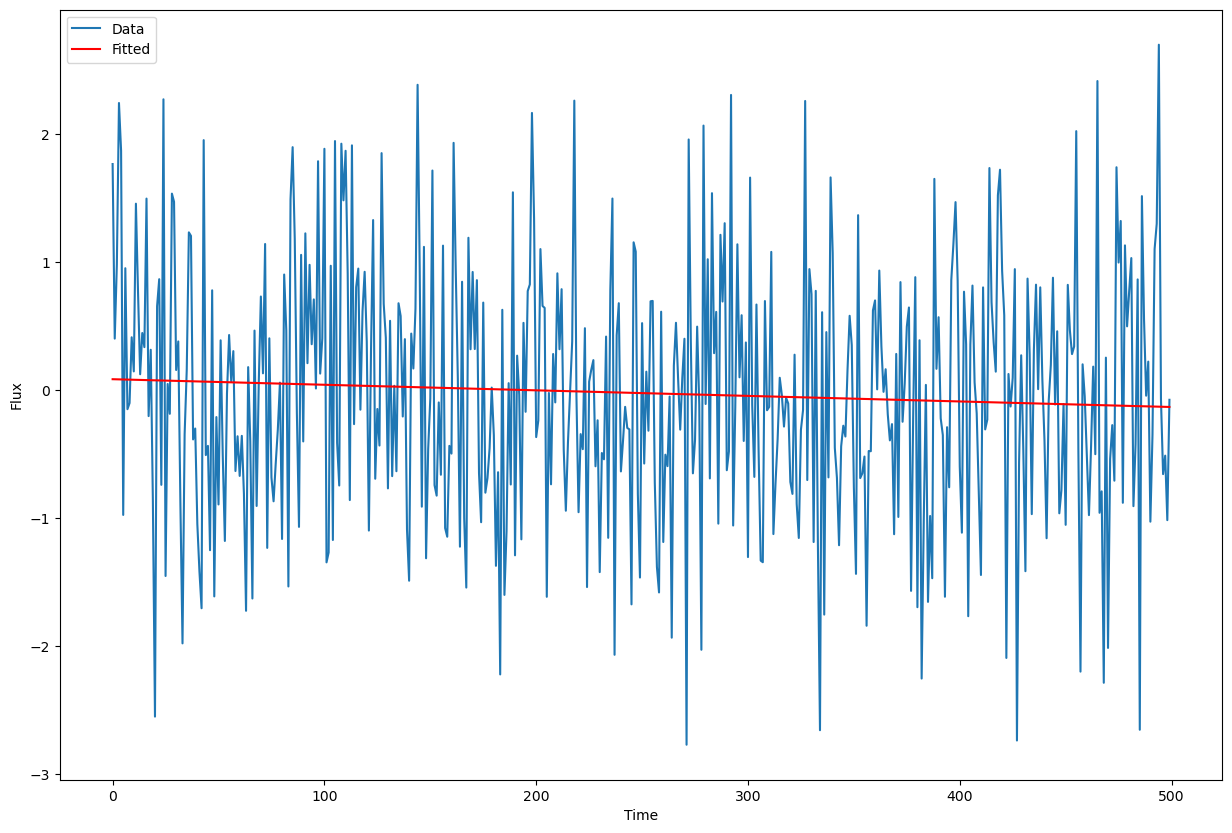

In [11]:
# Stat check two
Time = Stat_chek_2[:,0]
Flux = Stat_chek_2[:,1]
Error = Stat_chek_2[:,2]
plt.rcParams['figure.figsize']=(15,10)
plt.plot(Time,Flux,label='Data')
plt.xlabel('Time') 
plt.ylabel('Flux')
def straightline_model(x,m,c):
    return m*x + c
params,cov = curve_fit(straightline_model,Time,Flux) #directly using the curve fit
print(params)
best_fit = straightline_model(Time,params[0],params[1])
plt.plot(Time,best_fit,'r',label='Fitted')
plt.legend()



The mean is:-0.044979611086389586 and variance is: 1.0096754391835183
The mean is:0.23692424069528567 and variance is: 1.0178912857727154
The mean is:-0.09225433186424929 and variance is: 0.9204542228561248
The mean is:-0.0774772166612737 and variance is: 0.9722767729214724
The mean is:-0.16844707628902142 and variance is: 0.946874551945893
The mean is:-0.008816177033216868 and variance is: 1.0651370599668135


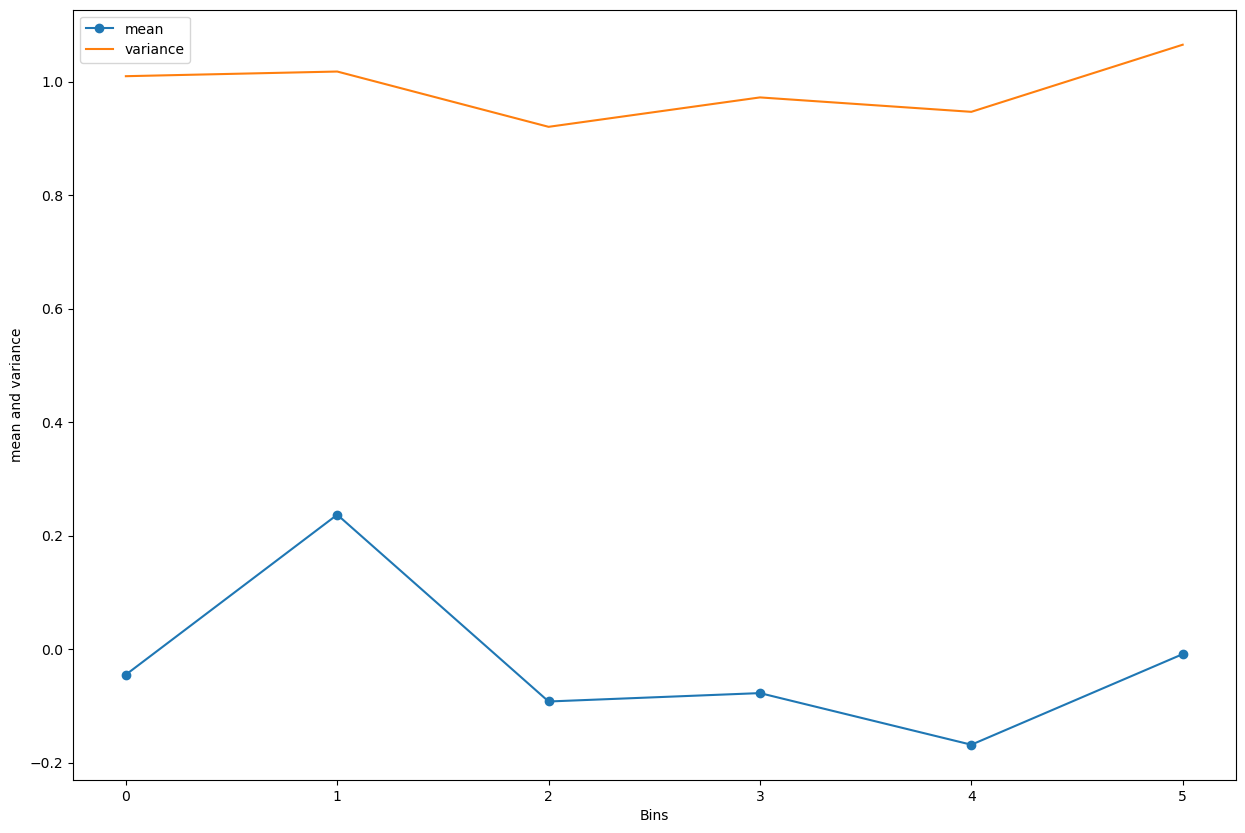

In [12]:
bins = np.array_split(Flux,6)
x = np.arange(0,6)
mean_1 = []
std_1 = []
for i in bins:
    mean = np.mean(i)
    std = np.std(i)
    mean_1.append(mean)
    std_1.append(std)
    print(f'The mean is:{mean} and variance is: {std}')
plt.plot(x,mean_1,'o-',label='mean')    
plt.plot(x,std_1,label="variance")
plt.xlabel('Bins') 
plt.ylabel('mean and variance')
plt.legend()

The mean is:-0.11000136185824905 and variance is: 1.0062360132061319
The mean is:0.20840056691710063 and variance is: 1.01510313899842
The mean is:-0.08449717910705547 and variance is: 0.9200581901827123
The mean is:-0.033656487826996796 and variance is: 0.9726457586962554
The mean is:-0.08856277137766143 and variance is: 0.9482430010404488
The mean is:0.10713170395522624 and variance is: 1.0654350358669766


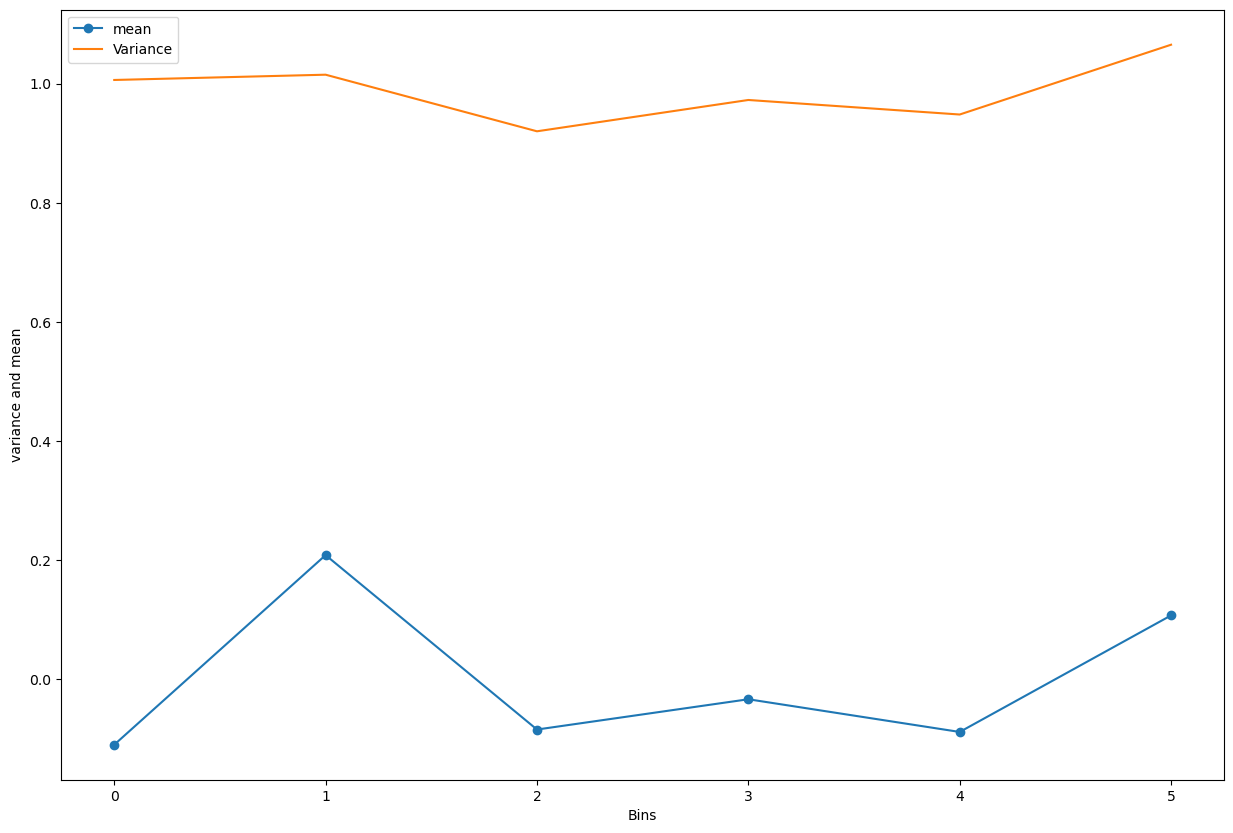

In [13]:
residue  = Flux - best_fit 
bins = np.array_split(residue,6)
x = np.arange(0,6)
mean_1 = []
std_1 = []
for i in bins:
    mean = np.mean(i)
    std = np.std(i)
    mean_1.append(mean)
    std_1.append(std)
    print(f'The mean is:{mean} and variance is: {std}')
plt.plot(x,mean_1,'o-',label = 'mean')    
plt.plot(x,std_1,label='Variance')
plt.xlabel('Bins') 
plt.ylabel('variance and mean')
plt.legend()